In [1]:
%load_ext sql

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
%sql postgresql:///decibel

u'Connected: None@decibel'

In [3]:
import psycopg2
db = psycopg2.connect('')

In [4]:
db

<connection object at 0x108bf18a0; dsn: '', closed: 0>

In [5]:
%sql SET application_name = 'ipython-sql'

Done.


[]

In [6]:
db.cursor().execute("SET application_name = 'psycopg2'")
db.commit()

In [7]:
db.cursor().execute('CREATE TEMP TABLE i(i int)')

In [8]:
%sql SELECT pid,datname,usename,application_name,state_change,state,query FROM pg_stat_activity

3 rows affected.


pid,datname,usename,application_name,state_change,state,query
89343,decibel,decibel,ipython-sql,2016-11-11 22:24:26.791184+00:00,active,"SELECT pid,datname,usename,application_name,state_change,state,query FROM pg_stat_activity"
89344,decibel,decibel,psycopg2,2016-11-11 22:24:26.781802+00:00,idle in transaction,CREATE TEMP TABLE i(i int)
55377,decibel,decibel,psql,2016-11-11 22:24:14.115556+00:00,idle,"SELECT n.nspname as ""Schema"", c.relname as ""Name"", CASE c.relkind WHEN 'r' THEN 'table' WHEN 'v' THEN 'view' WHEN 'm' THEN 'materialized view' WHEN 'i' THEN 'index' WHEN 'S' THEN 'sequence' WHEN 's' THEN 'special' WHEN 'f' THEN 'foreign table' END as ""Type"", pg_catalog.pg_get_userbyid(c.relowner) as ""Owner""FROM pg_catalog.pg_class c LEFT JOIN pg_catalog.pg_namespace n ON n.oid = c.relnamespaceWHERE c.relkind IN ('r','') AND n.nspname <> 'pg_catalog' AND n.nspname <> 'information_schema' AND n.nspname !~ '^pg_toast' AND pg_catalog.pg_table_is_visible(c.oid)ORDER BY 1,2;"


In [9]:
%%sql
ROLLBACK;
SELECT pid,datname,usename,application_name,state_change,state,query FROM pg_stat_activity;

Done.
3 rows affected.


pid,datname,usename,application_name,state_change,state,query
89343,decibel,decibel,,2016-11-11 22:24:26.814015+00:00,active,"SELECT pid,datname,usename,application_name,state_change,state,query FROM pg_stat_activity;"
89344,decibel,decibel,psycopg2,2016-11-11 22:24:26.781802+00:00,idle in transaction,CREATE TEMP TABLE i(i int)
55377,decibel,decibel,psql,2016-11-11 22:24:14.115556+00:00,idle,"SELECT n.nspname as ""Schema"", c.relname as ""Name"", CASE c.relkind WHEN 'r' THEN 'table' WHEN 'v' THEN 'view' WHEN 'm' THEN 'materialized view' WHEN 'i' THEN 'index' WHEN 'S' THEN 'sequence' WHEN 's' THEN 'special' WHEN 'f' THEN 'foreign table' END as ""Type"", pg_catalog.pg_get_userbyid(c.relowner) as ""Owner""FROM pg_catalog.pg_class c LEFT JOIN pg_catalog.pg_namespace n ON n.oid = c.relnamespaceWHERE c.relkind IN ('r','') AND n.nspname <> 'pg_catalog' AND n.nspname <> 'information_schema' AND n.nspname !~ '^pg_toast' AND pg_catalog.pg_table_is_visible(c.oid)ORDER BY 1,2;"


In [10]:
%sql SELECT * FROM pg_tables WHERE tableowner='decibel'

2 rows affected.


schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
public,foo,decibel,None,False,False,False,False
public,copy,decibel,None,False,False,False,False


In [11]:
db.commit()

In [12]:
%sql SELECT * FROM pg_tables WHERE tableowner='decibel'

3 rows affected.


schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
pg_temp_3,i,decibel,None,False,False,False,False
public,foo,decibel,None,False,False,False,False
public,copy,decibel,None,False,False,False,False


In [13]:
c = db.cursor()

In [14]:
c.execute("SELECT * FROM pg_tables WHERE tableowner='decibel'")

In [15]:
r = c.fetchone()

In [16]:
r

('pg_temp_3', 'i', 'decibel', None, False, False, False, False)

In [17]:
for result in c:
    print result

('public', 'foo', 'decibel', None, False, False, False, False)
('public', 'copy', 'decibel', None, False, False, False, False)


In [18]:
SQLactivity="SELECT pid,datname,usename,application_name,state_change,state,query FROM pg_stat_activity"
c.execute(SQLactivity)

In [19]:
c.fetchmany(2)

[(89343,
  'decibel',
  'decibel',
  '',
  datetime.datetime(2016, 11, 11, 22, 24, 26, 844320, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=0, name=None)),
  'idle',
  "SELECT * FROM pg_tables WHERE tableowner='decibel'"),
 (89344,
  'decibel',
  'decibel',
  'psycopg2',
  datetime.datetime(2016, 11, 11, 22, 24, 26, 906082, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=0, name=None)),
  'active',
  'SELECT pid,datname,usename,application_name,state_change,state,query FROM pg_stat_activity')]

In [20]:
c.statusmessage

'SELECT 3'

In [21]:
c.rownumber

2

In [22]:
c.rowcount

3

In [23]:
len(c.fetchall())

1

In [24]:
len(r)

8

In [25]:
r = %sql SELECT schemaname,count(*) FROM pg_tables GROUP BY schemaname

4 rows affected.


In [26]:
import pandas as pd

In [27]:
df = r.DataFrame()

In [28]:
df

,schemaname,count
0,information_schema,7
1,pg_catalog,54
2,pg_temp_3,1
3,public,2


In [29]:
r

schemaname,count
information_schema,7
pg_catalog,54
pg_temp_3,1
public,2


In [30]:
%matplotlib inline

([<matplotlib.patches.Wedge at 0x109875310>,
  <matplotlib.text.Text at 0x109895690>])

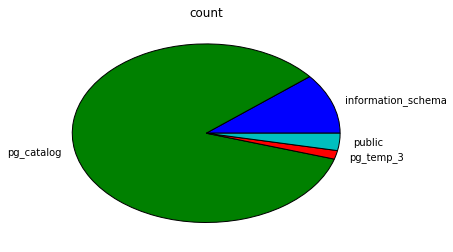

In [31]:
r.pie()

In [32]:
%sql PERSIST df

u'Persisted df'

In [33]:
%sql SELECT * FROM df

4 rows affected.


index,schemaname,count
0,information_schema,7
1,pg_catalog,54
2,pg_temp_3,1
3,public,2


In [34]:
%%sql
rollback;
SELECT * FROM df;

Done.
4 rows affected.


index,schemaname,count
0,information_schema,7
1,pg_catalog,54
2,pg_temp_3,1
3,public,2


In [35]:
r

schemaname,count
information_schema,7
pg_catalog,54
pg_temp_3,1
public,2


In [36]:
%sql PERSIST r

TypeError: r is not a Pandas DataFrame or Series

In [37]:
c.execute('SELECT * FROM df')
df_psy_result = c.fetchall()
df_psy_result

[(0L, 'information_schema', 7L),
 (1L, 'pg_catalog', 54L),
 (2L, 'pg_temp_3', 1L),
 (3L, 'public', 2L)]

In [38]:
type(df_psy_result)

list

In [39]:
type(df_psy_result[0])

tuple

In [40]:
c.description

(Column(name='index', type_code=20, display_size=None, internal_size=8, precision=None, scale=None, null_ok=None),
 Column(name='schemaname', type_code=25, display_size=None, internal_size=-1, precision=None, scale=None, null_ok=None),
 Column(name='count', type_code=20, display_size=None, internal_size=8, precision=None, scale=None, null_ok=None))

In [41]:
import psycopg2.extras
c2 = db.cursor(cursor_factory=psycopg2.extras.DictCursor)
c2.execute('SELECT * FROM df')
c2_df_result = c2.fetchall()
c2_df_result

[[0L, 'information_schema', 7L],
 [1L, 'pg_catalog', 54L],
 [2L, 'pg_temp_3', 1L],
 [3L, 'public', 2L]]

In [42]:
type(c2_df_result[0])

psycopg2.extras.DictRow

In [43]:
row = c2_df_result[0]

In [44]:
row.keys()

['count', 'index', 'schemaname']

In [45]:
row

[0L, 'information_schema', 7L]

In [46]:
row[0]

0L

In [47]:
row['index']

0L

In [48]:
row['index'] is row[0]

True

In [49]:
c2.execute('UPDATE df SET index=index*10')

In [50]:
c2_df_result

[[0L, 'information_schema', 7L],
 [1L, 'pg_catalog', 54L],
 [2L, 'pg_temp_3', 1L],
 [3L, 'public', 2L]]

In [51]:
c2.fetchall()

ProgrammingError: no results to fetch

In [52]:
c2.execute('SELECT * FROM df')

In [53]:
c2.fetchall()

[[0L, 'information_schema', 7L],
 [10L, 'pg_catalog', 54L],
 [20L, 'pg_temp_3', 1L],
 [30L, 'public', 2L]]

In [54]:
db.rollback()
c.execute('UPDATE df SET index=index+10')
c2.fetchall()

[]

In [55]:
c2.execute('SELECT * FROM df')
c2.fetchall()

[[10L, 'information_schema', 7L],
 [11L, 'pg_catalog', 54L],
 [12L, 'pg_temp_3', 1L],
 [13L, 'public', 2L]]

In [56]:
%sql SELECT * FROM df

4 rows affected.


index,schemaname,count
0,information_schema,7
1,pg_catalog,54
2,pg_temp_3,1
3,public,2


In [57]:
c2.commit()

AttributeError: 'DictCursor' object has no attribute 'commit'

In [58]:
c2.connection.commit()

In [59]:
%sql SELECT * FROM df

4 rows affected.


index,schemaname,count
10,information_schema,7
11,pg_catalog,54
12,pg_temp_3,1
13,public,2


In [60]:
c2_df_result

[[0L, 'information_schema', 7L],
 [1L, 'pg_catalog', 54L],
 [2L, 'pg_temp_3', 1L],
 [3L, 'public', 2L]]

In [61]:
c.execute(SQLactivity)
pd.DataFrame(c.fetchall())

,0,1,2,3,4,5,6
0,89343,decibel,decibel,,2016-11-11 22:25:17.138888+00:00,idle,SELECT * FROM df
1,89344,decibel,decibel,psycopg2,2016-11-11 22:25:18.017973+00:00,active,"SELECT pid,datname,usename,application_name,st..."
2,89346,decibel,decibel,,2016-11-11 22:24:27.679799+00:00,idle,COMMIT
3,55377,decibel,decibel,psql,2016-11-11 22:24:14.115556+00:00,idle,"SELECT n.nspname as ""Schema"",\n c.relname as ..."


In [62]:
c2.execute(SQLactivity)
pd.DataFrame([row for row in c2])

TypeError: Expected list, got DictRow

In [63]:
c2.execute(SQLactivity)
pd.DataFrame([dict(row) for row in c2])

,application_name,datname,pid,query,state,state_change,usename
0,,decibel,89343,SELECT * FROM df,idle,2016-11-11 22:25:17.138888+00:00,decibel
1,psycopg2,decibel,89344,"SELECT pid,datname,usename,application_name,st...",active,2016-11-11 22:25:18.017973+00:00,decibel
2,,decibel,89346,COMMIT,idle,2016-11-11 22:24:27.679799+00:00,decibel
3,psql,decibel,55377,"SELECT n.nspname as ""Schema"",\n c.relname as ...",idle,2016-11-11 22:24:14.115556+00:00,decibel


In [64]:
%sql SELECT pid,datname,usename,application_name,state_change,state,query FROM pg_stat_activity

4 rows affected.


pid,datname,usename,application_name,state_change,state,query
89343,decibel,decibel,,2016-11-11 22:25:33.035488+00:00,active,"SELECT pid,datname,usename,application_name,state_change,state,query FROM pg_stat_activity"
89344,decibel,decibel,psycopg2,2016-11-11 22:25:20.364227+00:00,idle in transaction,"SELECT pid,datname,usename,application_name,state_change,state,query FROM pg_stat_activity"
89346,decibel,decibel,,2016-11-11 22:24:27.679799+00:00,idle,COMMIT
55377,decibel,decibel,psql,2016-11-11 22:24:14.115556+00:00,idle,"SELECT n.nspname as ""Schema"", c.relname as ""Name"", CASE c.relkind WHEN 'r' THEN 'table' WHEN 'v' THEN 'view' WHEN 'm' THEN 'materialized view' WHEN 'i' THEN 'index' WHEN 'S' THEN 'sequence' WHEN 's' THEN 'special' WHEN 'f' THEN 'foreign table' END as ""Type"", pg_catalog.pg_get_userbyid(c.relowner) as ""Owner""FROM pg_catalog.pg_class c LEFT JOIN pg_catalog.pg_namespace n ON n.oid = c.relnamespaceWHERE c.relkind IN ('r','') AND n.nspname <> 'pg_catalog' AND n.nspname <> 'information_schema' AND n.nspname !~ '^pg_toast' AND pg_catalog.pg_table_is_visible(c.oid)ORDER BY 1,2;"


In [65]:
new_df=pd.read_sql(SQLactivity, db)
new_df

,pid,datname,usename,application_name,state_change,state,query
0,89343,decibel,decibel,,2016-11-11 22:25:17.138888+00:00,idle,SELECT * FROM df
1,89344,decibel,decibel,psycopg2,2016-11-11 22:25:18.017973+00:00,active,"SELECT pid,datname,usename,application_name,st..."
2,89346,decibel,decibel,,2016-11-11 22:24:27.679799+00:00,idle,COMMIT
3,55377,decibel,decibel,psql,2016-11-11 22:24:14.115556+00:00,idle,"SELECT n.nspname as ""Schema"",\n c.relname as ..."


In [66]:
c2_df_result

[[0L, 'information_schema', 7L],
 [1L, 'pg_catalog', 54L],
 [2L, 'pg_temp_3', 1L],
 [3L, 'public', 2L]]

In [67]:
%sql SELECT * FROM df

4 rows affected.


index,schemaname,count
10,information_schema,7
11,pg_catalog,54
12,pg_temp_3,1
13,public,2


In [68]:
c2.execute('CREATE TABLE df2(s serial, index int, schemaname name, count bigint)')
SQLdf2_insert='INSERT INTO df2 VALUES(DEFAULT, %(index)s, %(schemaname)s, %(count)s)'
c2.execute(SQLdf2_insert, c2_df_result[0])

In [69]:
%sql SELECT * FROM df2

(ProgrammingError) relation "df2" does not exist
LINE 1: SELECT * FROM df2
                      ^
 'SELECT * FROM df2' {}


In [70]:
db.commit()

In [71]:
%sql SELECT * FROM df2

1 rows affected.


s,index,schemaname,count
1,0,information_schema,7


In [75]:
c.executemany(SQLdf2_insert, c2_df_result)
pd.read_sql('SELECT * FROM df2', db)

,s,index,schemaname,count
0,1,0,information_schema,7
1,6,0,information_schema,7
2,7,1,pg_catalog,54
3,8,2,pg_temp_3,1
4,9,3,public,2


In [76]:
c.execute('SELECT * FROM df2')
c.fetchall()

[(1, 0, 'information_schema', 7L),
 (6, 0, 'information_schema', 7L),
 (7, 1, 'pg_catalog', 54L),
 (8, 2, 'pg_temp_3', 1L),
 (9, 3, 'public', 2L)]

In [77]:
c3=db.cursor(cursor_factory=psycopg2.extras.NamedTupleCursor)
c3.execute('SELECT * FROM df2')
r=c3.fetchall()
r

[Record(s=1, index=0, schemaname='information_schema', count=7L),
 Record(s=6, index=0, schemaname='information_schema', count=7L),
 Record(s=7, index=1, schemaname='pg_catalog', count=54L),
 Record(s=8, index=2, schemaname='pg_temp_3', count=1L),
 Record(s=9, index=3, schemaname='public', count=2L)]

In [78]:
r[0]

Record(s=1, index=0, schemaname='information_schema', count=7L)

In [79]:
r[0][0]

1

In [80]:
r[0].s

1

In [81]:
c3.execute(SQLdf2_insert + ' RETURNING *', r[0]._asdict())
c3.fetchall()

[Record(s=10, index=0, schemaname='information_schema', count=7L)]